In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_dir = "C:\\Users\\dongh\\Downloads\\MBD project\\"

In [3]:
listc = ["Time","Alberta","British Columbia","Manitoba","Nova Scotia","Ontario","Quebec"]
lista = ["California","Colorado","Florida","Georgia","Hawaii","Illinois","Massachusetts"
         ,"Michigan","North Carolina","New Jersey","Nevada","New York","Texas","Virginia","Washington"]

In [4]:
us = pd.read_csv(data_dir + "US-bystate.csv")
us.columns.values[0] = "Index"
us = us.set_index("Index")
us = us.transpose()
us = us.reset_index()
Others = pd.read_csv(data_dir + "Others.csv")
impact = pd.read_csv(data_dir + "irport_traffic.csv")
canada = Others.loc[:,listc]

In [5]:
list = us.columns.values
list[0] = "Time"
us.columns = list
us.head()

,Time,New York,California,Florida,Hawaii,Nevada,Massachusetts,Texas,Illinois,New Jersey,Washington,Georgia,Virginia,Colorado,North Carolina,Michigan
0,1/23/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1/24/2020,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1/25/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1/26/2020,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1/27/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
canada.head()

,Time,Alberta,British Columbia,Manitoba,Nova Scotia,Ontario,Quebec
0,1/23/2020,0,0,0,0,0,0
1,1/24/2020,0,0,0,0,0,0
2,1/25/2020,0,0,0,0,0,0
3,1/26/2020,0,0,0,0,1,0
4,1/27/2020,0,0,0,0,0,0


In [7]:
impact.head()

,Date,PercentOfBaseline,State
0,3/16/2020,92,New South Wales
1,3/16/2020,96,Santiago Province
2,3/16/2020,100,Alberta
3,3/16/2020,63,Alberta
4,3/16/2020,100,British Columbia


In [8]:
cali_inf = canada.loc[:,["Time","Ontario"]]
cali_inf = cali_inf.reset_index()
cali_inf = cali_inf.drop("index",axis=1)
cali_inf.head()

,Time,Ontario
0,1/23/2020,0
1,1/24/2020,0
2,1/25/2020,0
3,1/26/2020,1
4,1/27/2020,0


In [10]:
cali_imp = impact.loc[impact.State == "Ontario",:]
cali_imp = cali_imp.reset_index()
cali_imp = cali_imp.drop("index",axis=1)
cali_imp.head()

,Date,PercentOfBaseline,State
0,3/16/2020,100,Ontario
1,3/16/2020,96,Ontario
2,3/17/2020,89,Ontario
3,3/17/2020,94,Ontario
4,3/18/2020,81,Ontario


In [11]:
index1 = cali_inf["Time"].values.tolist()
index1 = index1.index("3/16/2020")
index2 = cali_inf["Time"].values.tolist()
index2 = index2.index("10/17/2020")
cali_inf = cali_inf.iloc[index1:index2,:]
cali_inf.shape

(215, 2)

In [12]:
cali_imp = cali_imp.drop("State",axis=1)
cali_imp.head()

,Date,PercentOfBaseline
0,3/16/2020,100
1,3/16/2020,96
2,3/17/2020,89
3,3/17/2020,94
4,3/18/2020,81


In [13]:
cali_imp = cali_imp.groupby("Date").mean()
cali_imp = cali_imp.reset_index()
cali_imp

,Date,PercentOfBaseline
0,10/1/2020,84.5
1,10/10/2020,65.0
2,10/11/2020,44.5
3,10/12/2020,13.5
4,10/13/2020,76.0
...,...,...
209,9/5/2020,64.5
210,9/6/2020,49.5
211,9/7/2020,15.0
212,9/8/2020,75.5


In [15]:
cali_inf.to_csv(r"C:\\Users\\dongh\\Downloads\\MBD project\\ontario_inf.csv", index=False, header=True)
cali_imp.to_csv(r"C:\\Users\\dongh\\Downloads\\MBD project\\ontario_imp.csv", index=False, header=True)

In [31]:
cali = pd.read_csv(data_dir + "ontario.csv")
cali.head()

,Time,Ontario,PercentOfBaseline
0,3/16/2020,73,98.0
1,3/17/2020,8,91.5
2,3/18/2020,36,90.5
3,3/19/2020,36,84.5
4,3/20/2020,51,82.5


In [32]:
N = 5
cali = cali.groupby(cali.index // N).mean()

In [33]:
cali = cali.reset_index()
cali["change"] = 0
for i in range(len(cali)):
    if i == 0:
        continue
    else:
        cali.iloc[i,3] = (cali.iloc[i,1] - cali.iloc[i-1,1])/cali.iloc[i-1,1]

In [34]:
cali = cali.iloc[1:,:]
cali.head()

,index,Ontario,PercentOfBaseline,change
1,1,76.0,78.2,0.862745
2,2,203.6,61.8,1.678947
3,3,384.8,68.4,0.889980
4,4,425.8,64.5,0.106549
5,5,438.8,40.9,0.030531


In [35]:
N = 3
tmp1 = pd.DataFrame(cali.PercentOfBaseline[:20])
tmp1["change"] = cali.iloc[(N):(20+N),3].tolist()

In [36]:
cali = tmp1[:]
cali.head()

,PercentOfBaseline,change
1,78.2,0.106549
2,61.8,0.030531
3,68.4,0.644485
4,64.5,-0.171563
5,40.9,-0.187688


In [37]:
cali.to_csv(r"C:\\Users\\dongh\\Downloads\\MBD project\\ontario2.csv", index=False, header=True)

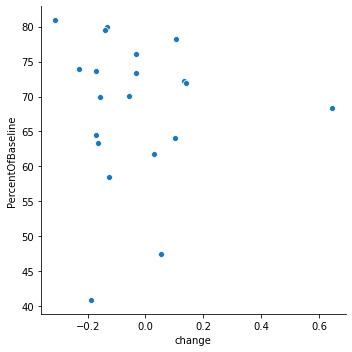

In [38]:
sns.relplot("change","PercentOfBaseline",data = tmp1)

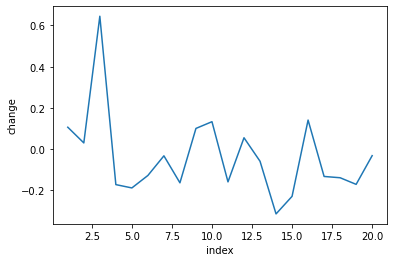

In [39]:
cali = cali.reset_index()
sns.lineplot("index","change",data = cali)

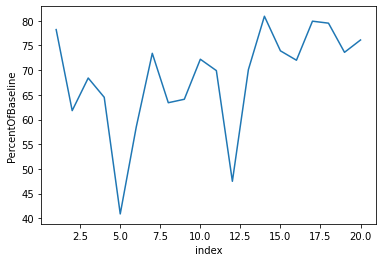

In [40]:
sns.lineplot("index","PercentOfBaseline",data = cali)

In [26]:
from statsmodels.api import OLS
OLS(cali.change,cali.PercentOfBaseline).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 change   R-squared (uncentered):                   0.154
Model:                            OLS   Adj. R-squared (uncentered):              0.110
Method:                 Least Squares   F-statistic:                              3.463
Date:                Sat, 21 Nov 2020   Prob (F-statistic):                      0.0783
Time:                        23:03:16   Log-Likelihood:                         -6.8702
No. Observations:                  20   AIC:                                      15.74
Df Residuals:                      19   BIC:                                      16.74
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
PercentOfBaseline     0.0022      0.001      1.861      0.078      -0.000       0.005
==============================================================================
Omnibus:                        2.305   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                1.681
Skew:                           0.697   Prob(JB):                        0.431
Kurtosis:                       2.724   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""